# Final model

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib


In [24]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load model
# forest model
with open('stroke_forest_pickle', 'rb') as f:
    forest = pickle.load(f)
# adaboost model
with open('stroke_ada_pickle', 'rb') as f:
    model_ada = pickle.load(f)
# forest_best model
with open('stroke_forest_best_pickle', 'rb') as f:
    forest_best = pickle.load(f)
# decision tree model
with open('stroke_dt_pickle', 'rb') as f:
    model_dt = pickle.load(f)

In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [6]:
# id index
df['id'] = df.index
# 결측값 제거
df = df.dropna()
df .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [7]:
X = df.drop(columns=['stroke'])
y = df.stroke

# EDA

In [12]:
# 전체의 5% 정도
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

/Users/sh/anaconda3/envs/skkuai/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='stroke', ylabel='count'>

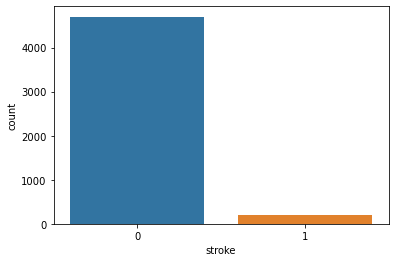

In [10]:
sns.countplot(df.stroke)

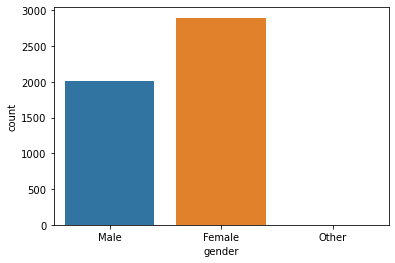

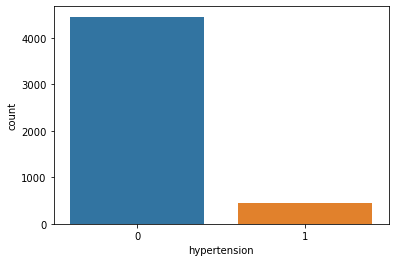

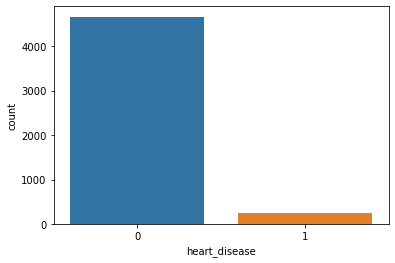

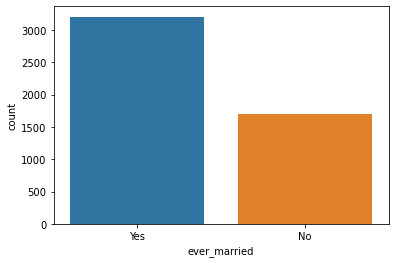

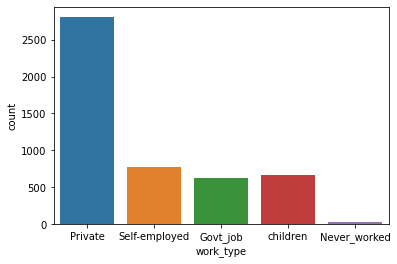

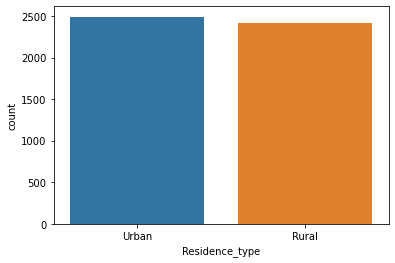

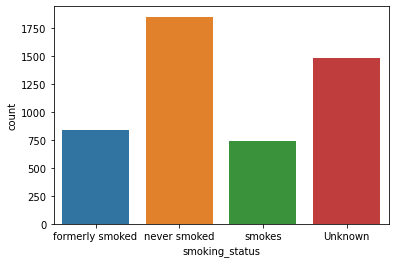

In [8]:
# Countplot for categorical columns
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    sns.countplot(x=col, data=df)
    plt.show()

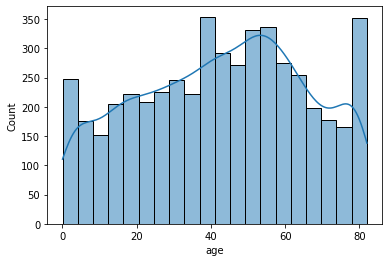

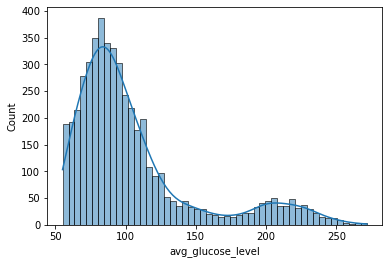

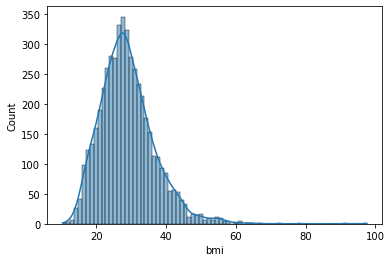

In [9]:
# Histogram for numerical columns
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.show()

<Axes: >

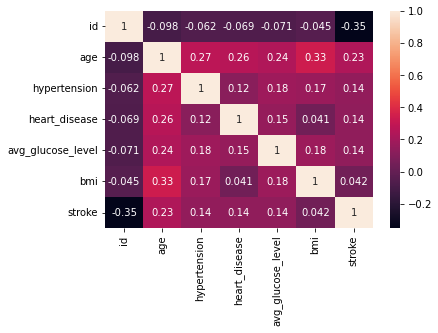

In [17]:
# heatmap
sns.heatmap(df.corr(), annot=True)

<Axes: >

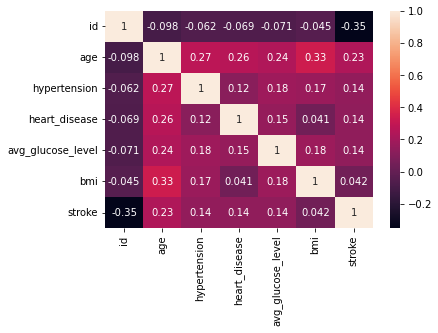

In [16]:
df_num = df[numerical_columns]
sns.heatmap(df_num.corr(), annot=True)

# 전처리

In [19]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3927, 11), (982, 11), (3927,), (982,))

In [20]:
#scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train[['age','avg_glucose_level','bmi']])
X_test_scaled = std_scaler.transform(X_test[['age','avg_glucose_level','bmi']])


# onehotencoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(X_train[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']])
X_train_enc = enc.transform(X_train[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]).toarray()
X_test_enc = enc.transform(X_test[['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]).toarray()
# data merge
X_train_proc = np.c_[X_train_scaled,X_train_enc]
X_test_proc = np.c_[X_test_scaled,X_test_enc]

# 학습

## Random forest, Decision tree, Adaboost

In [10]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(100, max_depth = 1, max_features = 2)
forest.fit(X_train_proc, y_train)

# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators = 9,
                               algorithm = 'SAMME.R',
                               learning_rate = 0.5).fit(X_train_proc, y_train)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, 
                                  random_state=0).fit(X_train_proc, y_train)

## SVM

In [ ]:
# 랜덤한 데이터 생성
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 1, 
                          n_classes = 2, n_clusters_per_class = 1, random_state = 30)
# make_classification 파라미터 설명
# n_features: 독립변수(피쳐)의 수
# n_informative: 독립변수 중 종속변수와 상관관계 있는 성분의 수
# n_redundant : 독립변수 중 다른 독립변수의 선형조합으로 나타나는 성분의 수

In [21]:
# 사이킷런의 SVM패키지 안에 서포트 벡터 머신의 모형 SVC(Support Vector Classifier)를 제공한다.

# step 1. 임포트 모델
from sklearn.svm import SVC

# 모델 선언 및 모델.fit(학습데이터)
linear_svc = SVC(kernel = 'linear', C = 1)
linear_svc.fit(X_train_proc, y_train)

SVC(C=1, kernel='linear')

In [23]:
print('train_score: {}'.format(linear_svc.score(X_train_proc, y_train)))
print('test_score: {}'.format(linear_svc.score(X_test_proc, y_test)))

train_score: 0.9602750190985485
test_score: 0.9460285132382892


In [26]:
print(classification_report(y_test, linear_svc.predict(X_test_proc)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/Users/sh/anaconda3/envs/skkuai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sh/anaconda3/envs/skkuai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sh/anaconda3/envs/skkuai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# C값이 커질 수록 마진이 작아진다. 
# C값을 변경해 가면서 각 모델들의 score를 확인하고자 한다.
# 한 번에 확인하기 위해서 C값을 리스트로 저장하고 for문을 이용하여 score를 구했다.

train_score = []
test_score = []

for C in C_list:
    linear_svm = SVC(kernel ='linear', C = C).fit(X_train, y_train)
    score_tr = linear_svm.score(X_train, y_train)
    score_te = linear_svm.score(X_test, y_test)
    train_score.append(score_tr)
    test_score.append(score_te)

    plt.figure(figsize=(10,5))
    mglearn.plots.plot_2d_classification(linear_svm, X_train, eps = 0.5, cm = 'terrain')
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

    plt.title(f"C : {C}")
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(train_score, 'go-')
plt.plot(test_score, 'mo:')
plt.xticks(range(len(C_list)),C_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()
#hyper parameter tuning 방법에 따라 최적을 찾아주면 됨. 
#hyper parameter tuning: 최적의 validation 성능을 보여주는 C값을 찾는 과정

# 평가

In [26]:
# Forest Score
print('train_score :{:.3f}'.format(forest.score(X_train_proc, y_train)))
print('test score : {:.3f}'.format(forest.score(X_test_proc, y_test)))

train_score :0.960
test score : 0.946


In [27]:
# Ada Score
print('train_score :{:.3f}'.format(model_ada.score(X_train_proc, y_train)))
print('test score : {:.3f}'.format(model_ada.score(X_test_proc, y_test)))

train_score :0.960
test score : 0.946


In [32]:
# Decision Tree score
print('train score : {:.3f}'.format(model_dt.score(X_train_proc, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test_proc, y_test)))

train score : 0.962
test socre : 0.941


# Tuning

## RF

In [11]:
# RandomForest
# Tune hyperparameters using GridSearchCV
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [1, 2, 3, 4, 5], 'max_features': [2, 3, 4]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_proc, y_train)
print('Best parameters for RandomForestClassifier:', grid_search.best_params_)
print('Best accuracy for RandomForestClassifier:', grid_search.best_score_)

Best parameters for RandomForestClassifier: {'max_depth': 1, 'max_features': 2, 'n_estimators': 50}
Best accuracy for RandomForestClassifier: 0.9602751981329314


In [16]:
# Randomforest @ Best parameters
from sklearn.ensemble import RandomForestClassifier
forest_best = RandomForestClassifier(50, max_depth = 1, max_features = 2)
forest_best.fit(X_train_proc, y_train)

RandomForestClassifier(max_depth=1, max_features=2, n_estimators=50)

In [24]:
# Forest_Best Score
print('train_score :{:.3f}'.format(forest_best.score(X_train_proc, y_train)))
print('test score : {:.3f}'.format(forest_best.score(X_test_proc, y_test)))

train_score :0.960
test score : 0.946


In [41]:
# forest importance
forest.feature_importances_

array([0.12, 0.06, 0.05, 0.05, 0.1 , 0.07, 0.14, 0.08, 0.06, 0.  , 0.04,
       0.02, 0.  , 0.06, 0.03, 0.01, 0.02, 0.03, 0.  , 0.06])

In [42]:
# adaboost importance
model_ada.feature_importances_

array([0.55555556, 0.33333333, 0.11111111, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [43]:
# forest_best importance
forest_best.feature_importances_

array([0.14, 0.04, 0.02, 0.12, 0.12, 0.06, 0.14, 0.04, 0.08, 0.  , 0.  ,
       0.04, 0.06, 0.04, 0.  , 0.02, 0.04, 0.04, 0.  , 0.  ])

In [44]:
# decision tree importance
model_dt.feature_importances_

array([0.63159702, 0.23679477, 0.09560668, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01268221, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02331932, 0.        ])

## DT

In [35]:
from sklearn.model_selection import GridSearchCV

# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=41, )

# param_grid 설정
dtc_param_grid = {
            "criterion" : ["gini", "entropy"],
            "max_depth" :   [2, 3, 4, 5,  6, 7, 8],
            "min_samples_leaf" : [1, 3, 5, 7]
            }
# 목적: validation 성능 최대되는 하이퍼파라미터 찾기
# Grad Search 객체 생성
gsDTC = GridSearchCV(DTC,
                     param_grid = dtc_param_grid, 
                     cv=4, 
                     scoring="accuracy", 
                     n_jobs= 4, 
                     verbose = 1)

# verbose: 돌아가는 중간중간 상황을 알려주길 원하면 verbose를 1,2,...로, 결과만 알고싶으면 0으로
# n_jobs: 병렬연산의 갯수, 컴퓨터 연산옵션..
# cv: 교차검증을 위한 fold 횟수

# Grid Search 실행
gsDTC.fit(X_train_proc,y_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=41), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [36]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
print(DTC_best)
# 최고 점수(accuracy) 출력
print(gsDTC.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=41)
0.9602750113666797


In [38]:
print('train score : {:.3f}'.format(DTC_best.score(X_train_proc, y_train)))
print('test socre : {:.3f}'.format(DTC_best.score(X_test_proc, y_test)))

train score : 0.960
test socre : 0.946


# 모델 저장

In [17]:
# Save model
# forest model
with open('stroke_forest_pickle', 'wb') as f:
    pickle.dump(forest, f)
# adaboost model
with open('stroke_ada_pickle', 'wb') as f:
    pickle.dump(model_ada, f)
# forest_best model
with open('stroke_forest_best_pickle', 'wb') as f:
    pickle.dump(forest_best, f)
# decision tree model
with open('stroke_dt_pickle', 'wb') as f:
    pickle.dump(model_dt, f)